In [1]:
###########################################################################################
# Code to automate the data extraction and creation of fundamental plots for the FE ASICs #
#                       --> Includes Cryocycles [0,5,20,100]                              #
#                               Author: Steven Doran                                      #
###########################################################################################

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

TotalChips = int(34)                              # specify number of chips you are using for data
TotalCryo = int(3); Cryocycles = [0,5,20]#,100]    # specify cryocyles

T = []
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataRT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'RT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.

print('done')

done


In [3]:
def PlotRT(Title,Ch_,Gain_,RMS_,Mean_,PF_,chipIndex,path):
    
    fig, (a,b,c) = plt.subplots(3, sharex = True)
    a.title.set_text(Title)
    fig.text(0.03,0.68, 'Gain [e/adc]', ha = 'center', rotation = 'vertical')
    fig.text(0.03,0.43, 'RMS [adc]', ha = 'center', rotation = 'vertical')
    fig.text(0.03,0.15, 'Mean [adc]', ha = 'center', rotation = 'vertical')
    plt.xlabel('P3 LArASIC Channel Number', loc = 'right')
    a.set_xticks(range(0,16)); b.set_xticks(range(0,16)); c.set_xticks(range(0,16))
    RMS_low = 20; RMS_high = 130
    Gain_low = 40; Gain_high = 60
    Mean_low = 1500; Mean_high = 3000
    
    a.set_ylim([Gain_low,Gain_high])
    b.set_ylim([RMS_low,RMS_high])
    c.set_ylim([Mean_low,Mean_high])
    
    # Specify Colors for Cryocycles
    color0 = 'green'
    color5 = 'blue'
    color20 = 'red'
    color100 = 'black'

    for i in range(len(Cryocycles)):
        for j in range(0,len(Gain_[i])):
            if i == 0:     # RT[0]
                if PF_[i][j] == 1.:
                    a.annotate('Fail', xy = (Ch_[i][j]-.25,49), fontsize = 6, color = color0, zorder=10)
                    b.annotate('Fail', xy = (Ch_[i][j]-.25,75), fontsize = 6, color = color0, zorder=10)
                    c.annotate('Fail', xy = (Ch_[i][j]-.25,2350), fontsize = 6, color = color0, zorder=10)
            if i == 1:     # RT[5]
                if PF_[i][j] == 1.:
                    a.annotate('Fail', xy = (Ch_[i][j]-.25,52), fontsize = 6, color = color5, zorder=10)
                    b.annotate('Fail', xy = (Ch_[i][j]-.25,85), fontsize = 6, color = color5, zorder=10)
                    c.annotate('Fail', xy = (Ch_[i][j]-.25,2500), fontsize = 6, color = color5, zorder=10)
            if i == 2:     # RT[20]
                if PF_[i][j] == 1.:
                    a.annotate('Fail', xy = (Ch_[i][j]-.25,55), fontsize = 6, color = color20, zorder=10)
                    b.annotate('Fail', xy = (Ch_[i][j]-.25,95), fontsize = 6, color = color20, zorder=10)
                    c.annotate('Fail', xy = (Ch_[i][j]-.25,2650), fontsize = 6, color = color20, zorder=10)
            if i == 3:     # RT[100]
                if PF_[i][j] == 1.:
                    a.annotate('Fail', xy = (Ch_[i][j]-.25,58), fontsize = 6, color = color100, zorder=10)
                    b.annotate('Fail', xy = (Ch_[i][j]-.25,105), fontsize = 6, color = color100, zorder=10)
                    c.annotate('Fail', xy = (Ch_[i][j]-.25,2800), fontsize = 6, color = color100, zorder=10)
                    
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #

    # Custom Legend for arrow markers and points - by cryocycle
    RT0_point = mlines.Line2D([],[],color=color0, marker = '.', linestyle = '-',
                              markersize = 6, label = 'RT[0]')
    RT5_point = mlines.Line2D([],[],color=color5, marker = '.', linestyle = '-',
                              markersize = 6, label = 'RT[5]')
    RT20_point = mlines.Line2D([],[],color=color20, marker = '.', linestyle = '-',
                              markersize = 6, label = 'RT[20]')
    RT100_point = mlines.Line2D([],[],color=color100, marker = '.', linestyle = '-',
                              markersize = 6, label = 'RT[100]')
    
    a.legend(handles=[RT0_point,RT5_point,RT20_point,RT100_point],                    
            bbox_to_anchor=(1.05,1), loc='upper left', fontsize = 6, ncol = 1,
            title = 'Legend', shadow = True)
    
    # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
    # Plotting
    
                               # Gain    
    # RT[0]
    a1 = a.plot(Ch_[0],Gain_[0],marker='.',color=color0) 
    # RT[5]
    a2 = a.plot(Ch_[1],Gain_[1],marker='.',color=color5) 
    # RT[20]
    a3 = a.plot(Ch_[2],Gain_[2],marker='.',color=color20) 
    '''
    # RT[100]
    a4 = a.plot(Ch_[3],Gain_[3],marker='.',color=color100) 
    '''
    a.tick_params(axis='y', labelsize=8)
    
    # # # # # # # # #
                             # RMS
    # RT[0]
    b1 = b.plot(Ch_[0],RMS_[0],marker = '.',color=color0) 
    # RT[5]
    b2 = b.plot(Ch_[1],RMS_[1],marker='.',color=color5) 
    # RT[20]
    b3 = b.plot(Ch_[2],RMS_[2],marker='.',color=color20) 
    '''
    # RT[100]
    b4 = b.plot(Ch_[3],RMS_[3],marker='.',color=color100) 
    '''
    b.tick_params(axis='y', labelsize=8)
    
    # # # # # # # # #
                              # Mean
    # RT[0]
    c1 = c.plot(Ch_[0],Mean_[0],marker='.',color=color0) 
    # RT[5]
    c2 = c.plot(Ch_[1],Mean_[1],marker='.',color=color5) 
    # RT[20]
    c3 = c.plot(Ch_[2],Mean_[2],marker='.',color=color20) 
    '''
    # RT[100]
    c4 = c.plot(Ch_[3],Mean_[3],marker='.',color=color100) 
    '''
    c.tick_params(axis='y', labelsize=8)
    
    # # # # # # # # #
    plt.subplots_adjust(right=0.75)
    
    plt.savefig(path,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')

    plt.show()

    return

print('done')

done


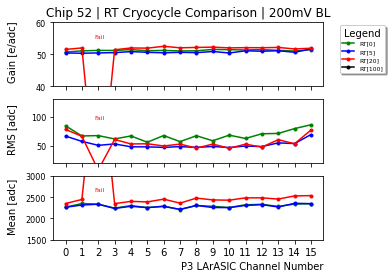

done


In [4]:
# Plotting Single ASIC

chip_number = 52

IN = chip_number - 20

Title = 'Chip ' + str(chip_number) + ' | RT Cryocycle Comparison | 200mV BL'

Ch_ = Ch[IN]; 
Gain_ = Gain[IN]; RMS_ = RMS[IN]; Mean_ = Mean[IN]; chipIndex = int(IN); PF_ = PF[IN]
path = '../../../../TEST.png'

PlotRT(Title,Ch_,Gain_,RMS_,Mean_,PF_,chipIndex,path)
print('done')

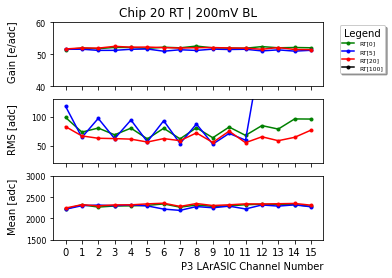

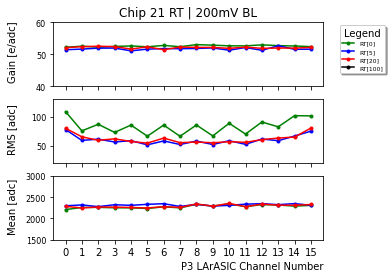

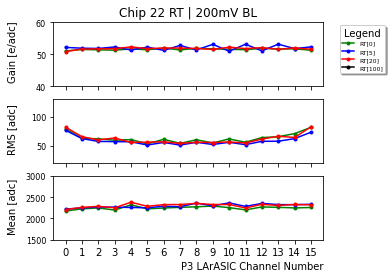

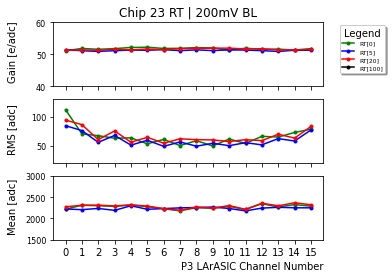

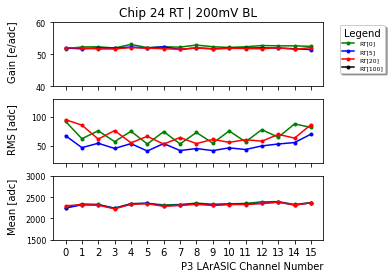

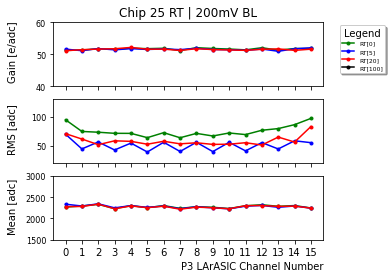

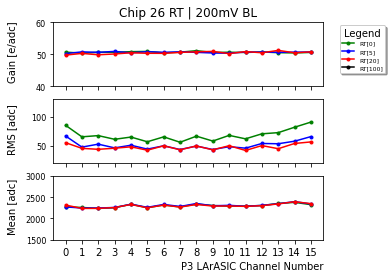

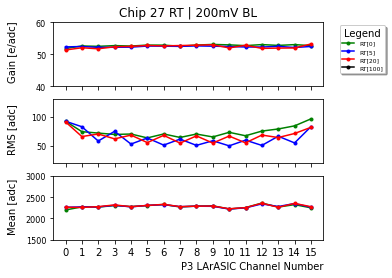

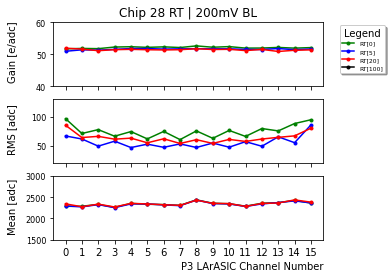

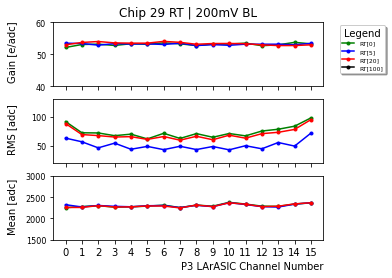

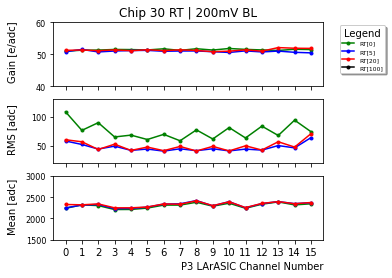

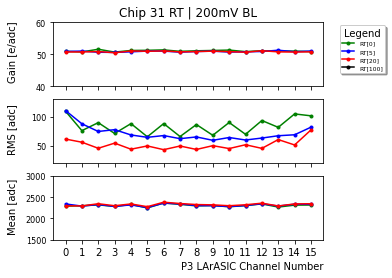

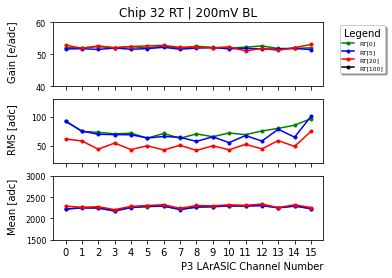

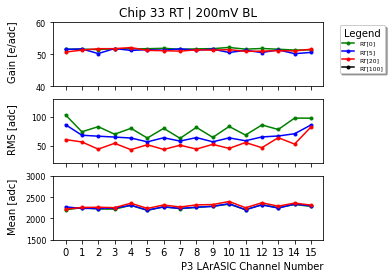

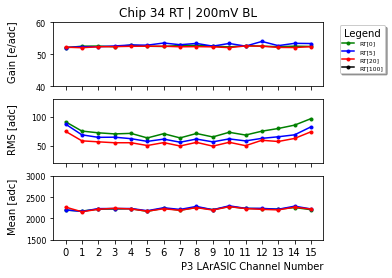

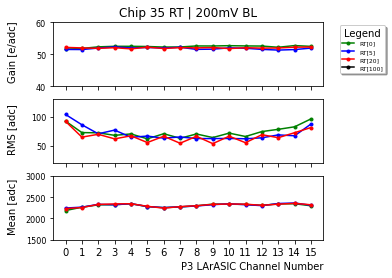

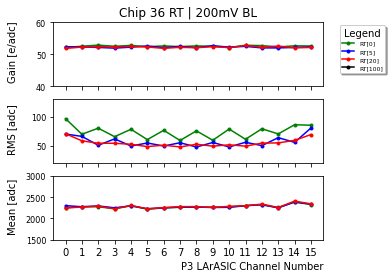

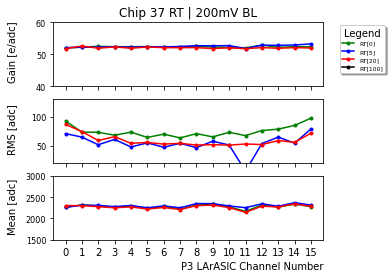

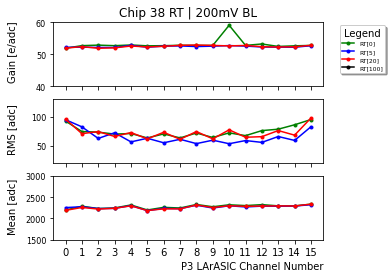

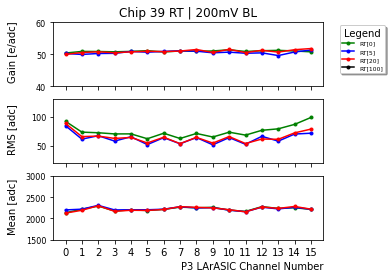

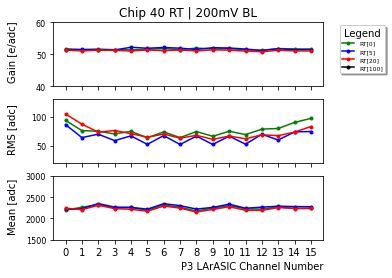

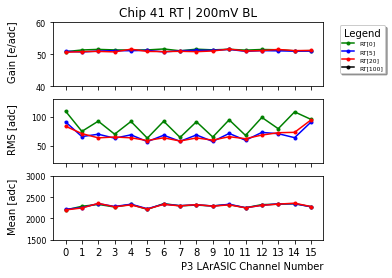

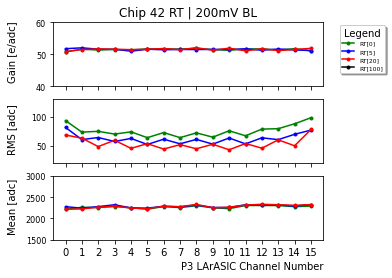

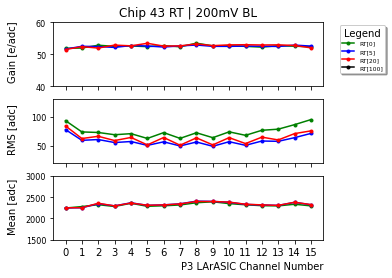

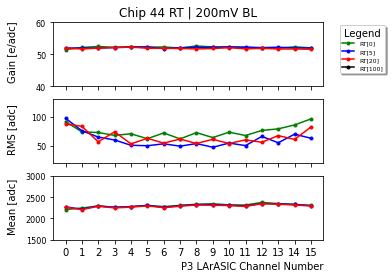

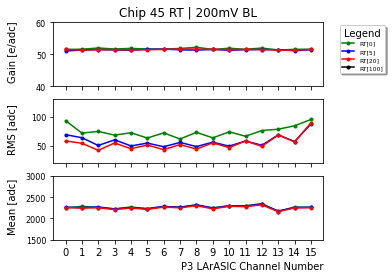

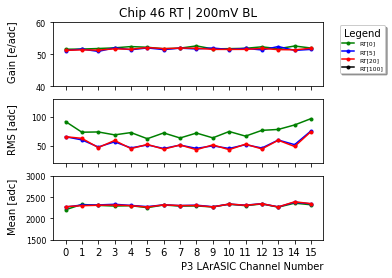

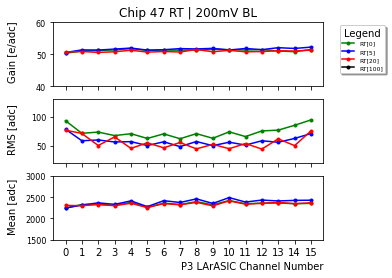

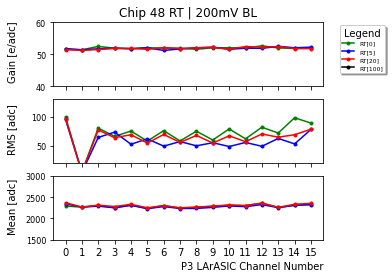

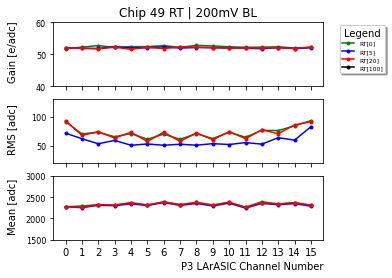

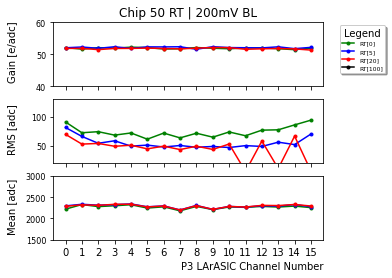

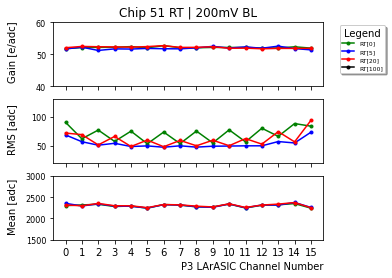

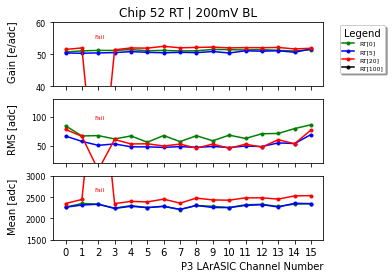

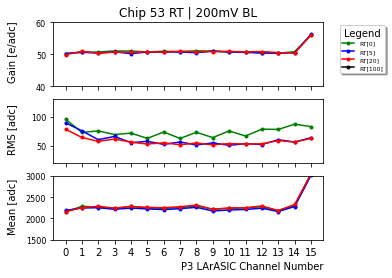


done


In [5]:
for i in range(len(chips)):
    IN = i
    Title = 'Chip ' + str(i+20) + ' RT | 200mV BL'
    Ch_ = Ch[IN]; Gain_ = Gain[IN]; RMS_ = RMS[IN]; Mean_ = Mean[IN]; chipIndex = int(IN); PF_ = PF[IN]
    path = '../Cryocycled Chip Catalog/' + str(i+20) + '/' + str(i+20) + ' RT RMS Mean Gain.png'
    PlotRT(Title,Ch_,Gain_,RMS_,Mean_,PF_,chipIndex,path)
    
print('\ndone')